In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
from ovejero import model_trainer, data_tools, bnn_inference

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Testing the Performance of Trained Models

__Author:__ Sebastian Wagner-Carena

__Created:__ 11/15/2019

__Last Run:__ 11/15/2019

__Goals:__ Inspect how the different bnn types and data augmentation strategies change the performance

## Diagonal Posterior - Normalizing Inputs

In [9]:
# First specify the config path
config_path = '/home/swagnercarena/ovejero/configs/t1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
bnn_infer.gen_samples(num_samples)

100%|██████████| 1000/1000 [00:59<00:00, 16.92it/s]


In [10]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.013735904582232448 0.01910693598585053
external_shear_g2 0.018545284043555897 0.023752059363233647
lens_mass_center_x 0.007296739660510778 0.023997848306299682
lens_mass_center_y 0.009956771537479009 0.022666914791020072
lens_mass_e1 0.022391524759497988 0.031679442419485185
lens_mass_e2 0.029775646238869587 0.041615640680013194
lens_mass_gamma 0.036106246609924564 0.05707107493025863
lens_mass_theta_E_log 0.00910789590262851 0.022977001387623142


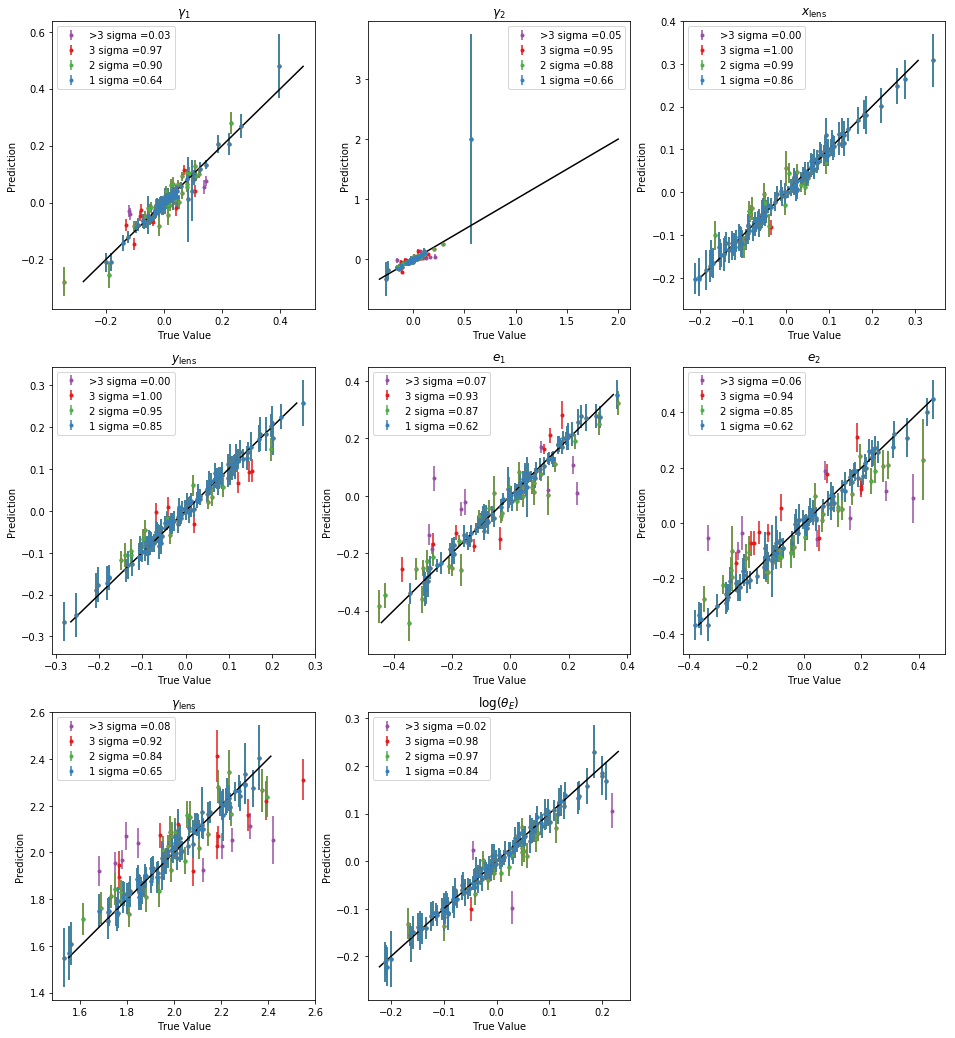

In [11]:
bnn_infer.gen_coverage_plots()

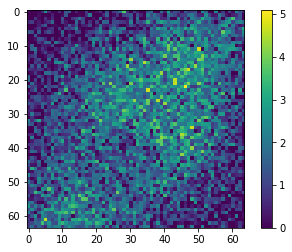

external_shear_g1 0.04196673
external_shear_g2 -0.106279664
lens_mass_center_x 0.0062502627
lens_mass_center_y 0.15292077
lens_mass_e1 0.21466625
lens_mass_e2 0.27505523
lens_mass_gamma 1.5530208
lens_mass_theta_E_log 0.028868675


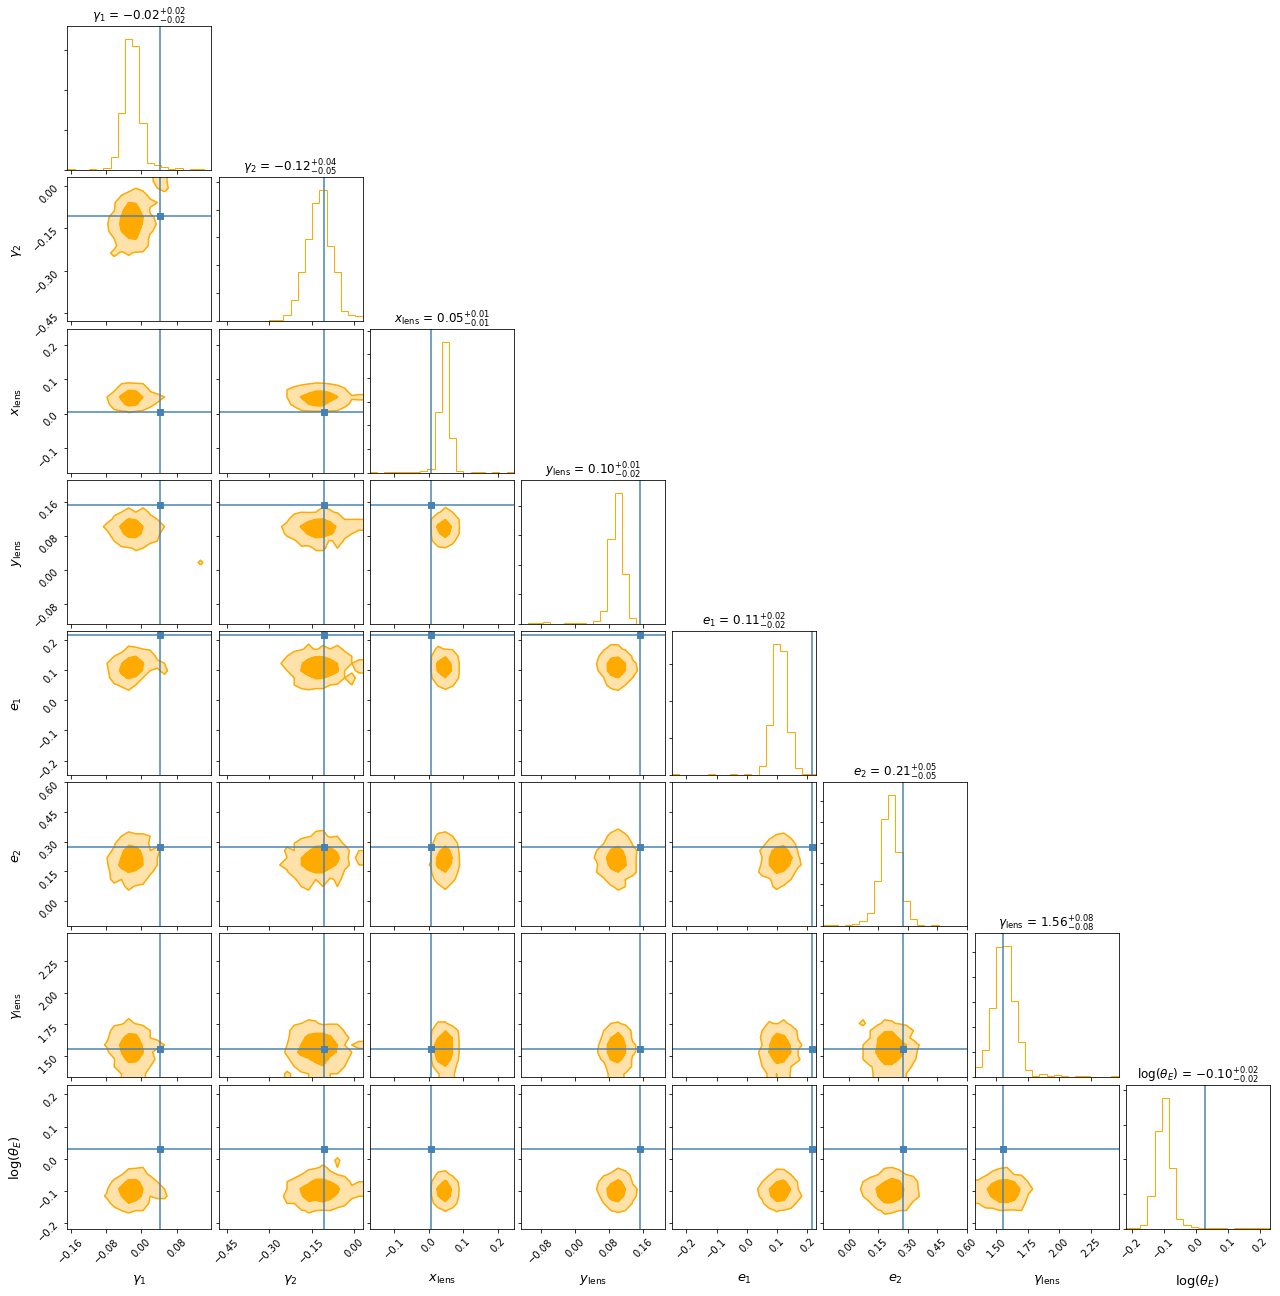

In [12]:
image_index = 10
bnn_infer.plot_posterior_contours(image_index)

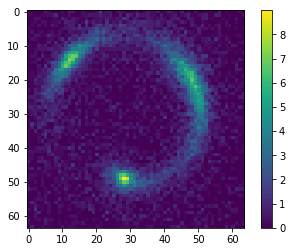

external_shear_g1 -0.014372064
external_shear_g2 0.020352703
lens_mass_center_x -0.06375193
lens_mass_center_y -0.01040145
lens_mass_e1 -0.21025127
lens_mass_e2 -0.13388728
lens_mass_gamma 2.223239
lens_mass_theta_E_log 0.09313953


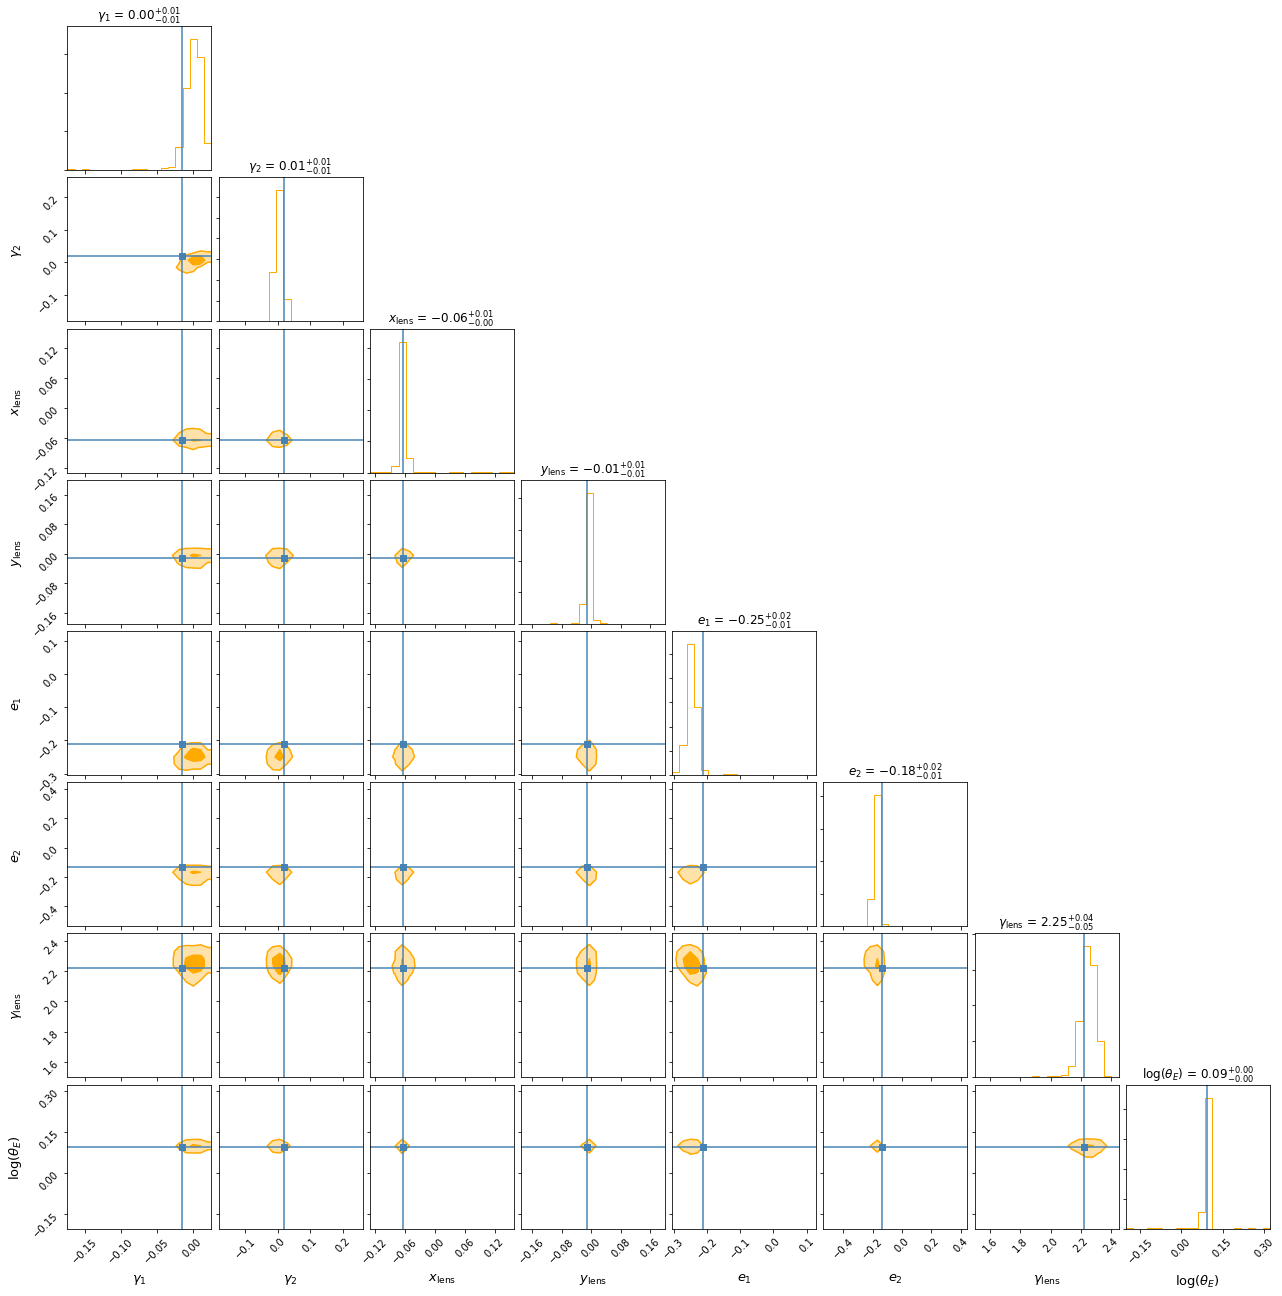

In [16]:
image_index = 5
bnn_infer.plot_posterior_contours(image_index)

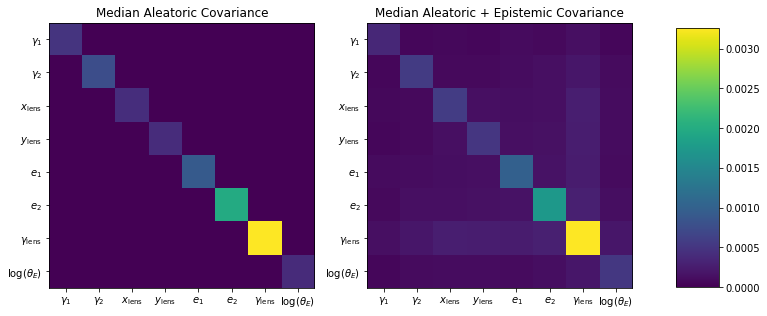

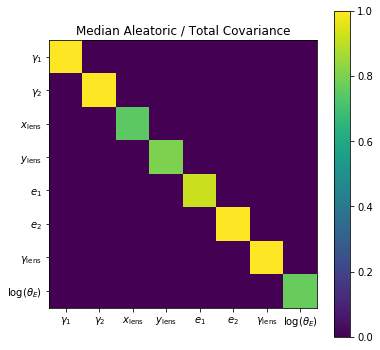

In [14]:
bnn_infer.comp_al_ep_unc()

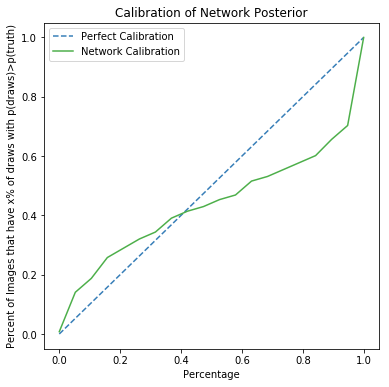

In [17]:
n_draws = 10000
color_map = ["#377eb8", "#4daf4a"]
n_perc_points = 20
bnn_infer.plot_calibration(n_draws=n_draws,color_map=color_map,n_perc_points=n_perc_points)

## Diagonal Posterior - Shifting Image

In [14]:
# First specify the config path
config_path = '/home/swagnercarena/ovejero/configs/t1_shift.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 100
bnn_infer.gen_samples(num_samples)

100%|██████████| 100/100 [00:06<00:00, 15.76it/s]


In [15]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.04466747170946503 0.02836550441003611
external_shear_g2 0.03227238234014592 0.06045991442035319
lens_mass_center_x 0.010513941533435416 0.03748223838456566
lens_mass_center_y 0.009336573593380169 0.03798894237215488
lens_mass_e1 0.025568812236462013 0.03994948901214891
lens_mass_e2 0.034007890581778735 0.04661804083744704
lens_mass_gamma 0.04532025233750325 0.07075128959847907
lens_mass_theta_E_log 0.010642605700792543 0.025306813784597294


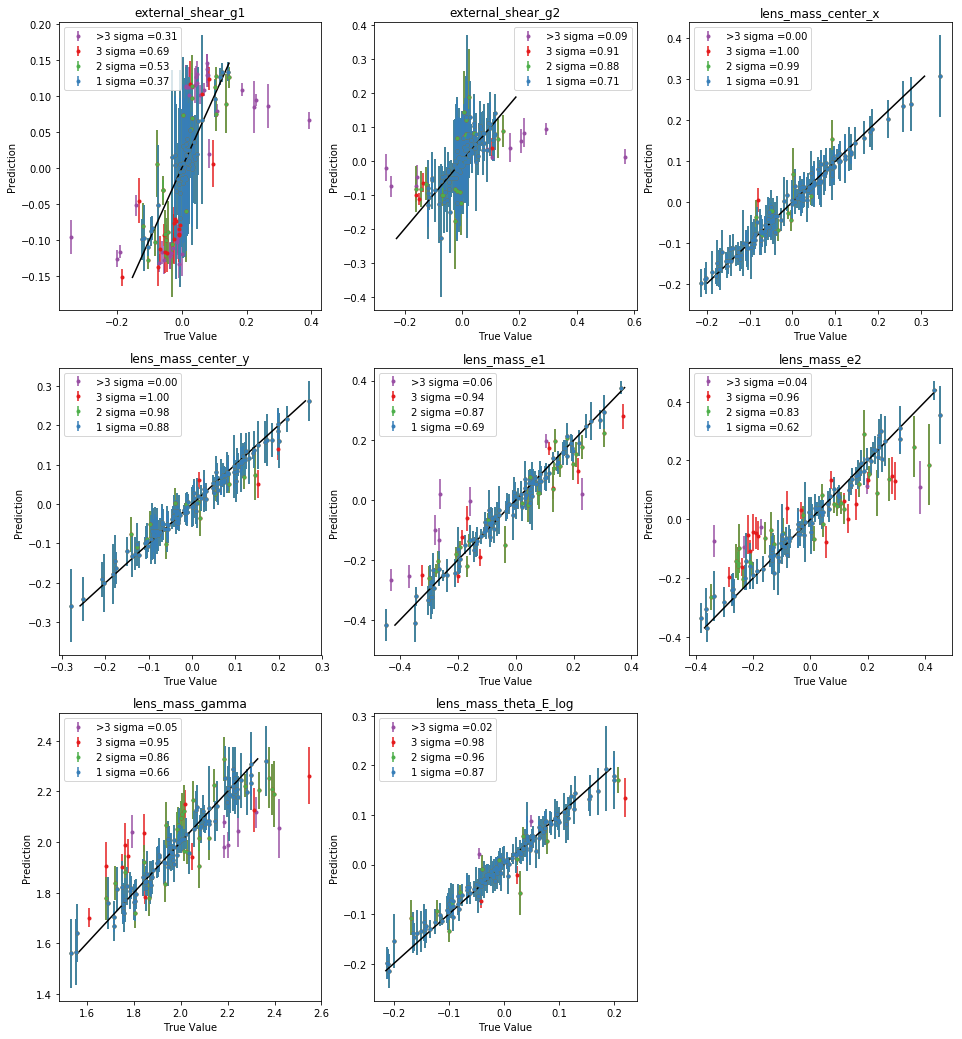

In [16]:
bnn_infer.gen_coverage_plots()

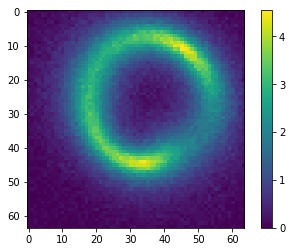

external_shear_g1 -0.048773624
external_shear_g2 -0.013596282
lens_mass_center_x 0.13594937
lens_mass_center_y -0.1384266
lens_mass_e1 -0.106109984
lens_mass_e2 0.042750333
lens_mass_gamma 2.0251117
lens_mass_theta_E_log -0.07558193


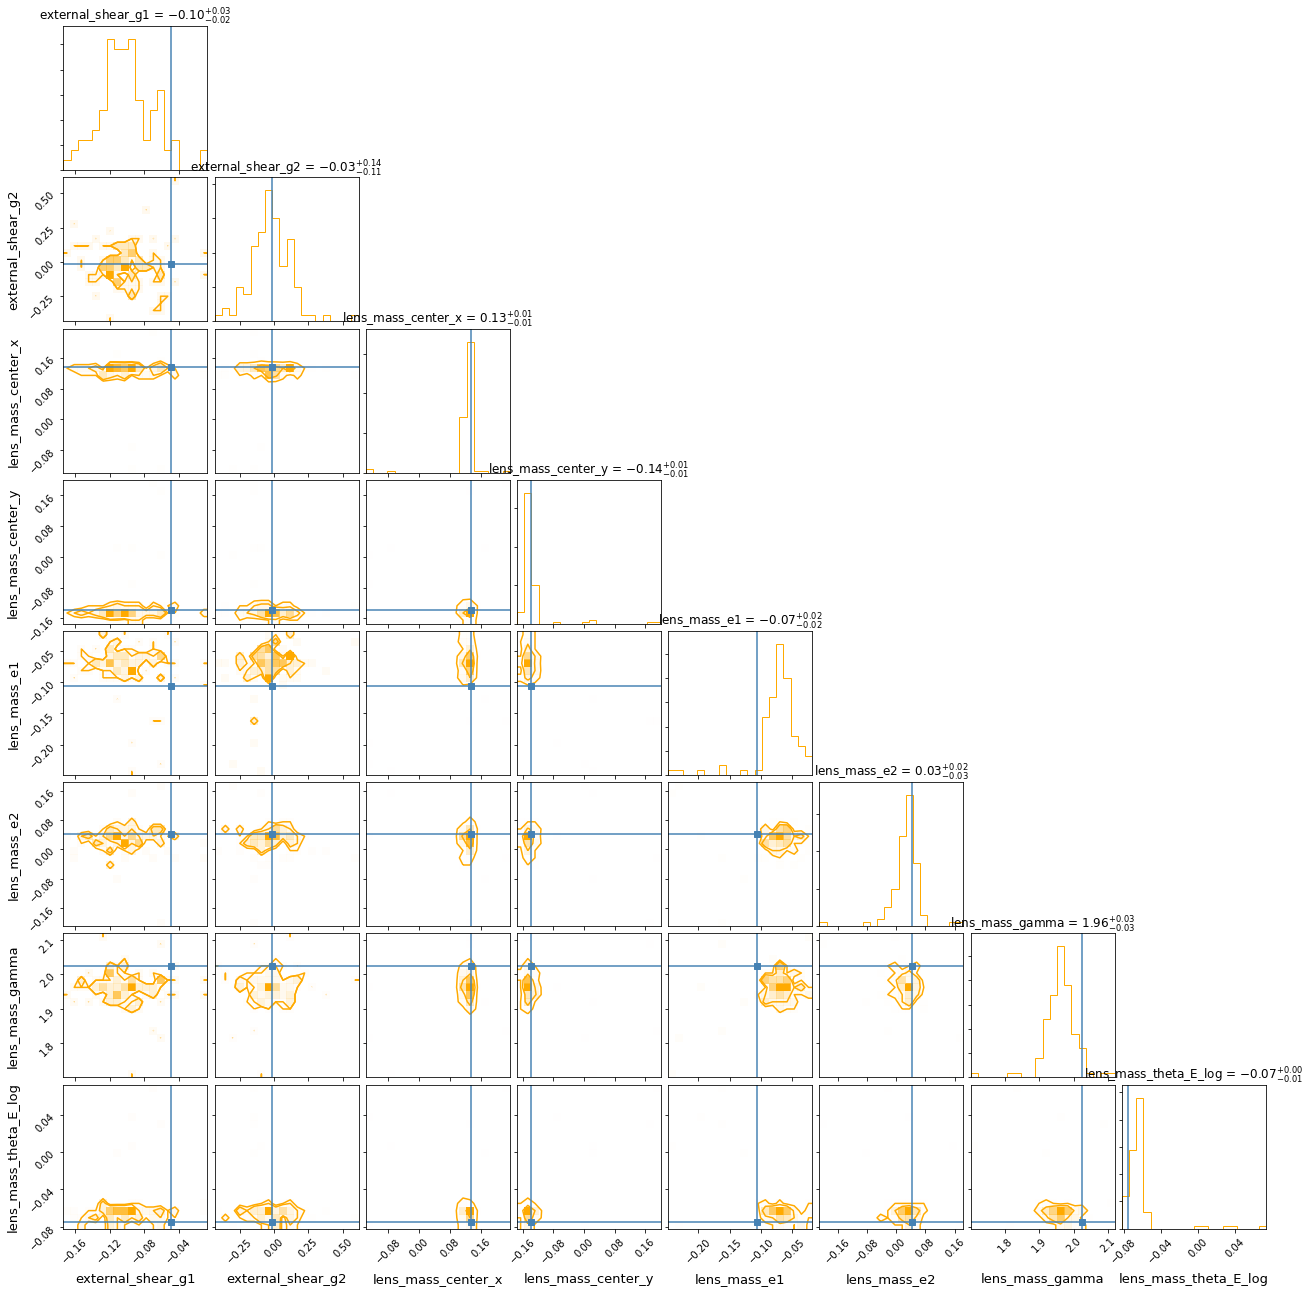

In [17]:
image_index = 10
bnn_infer.plot_posterior_contours(image_index)

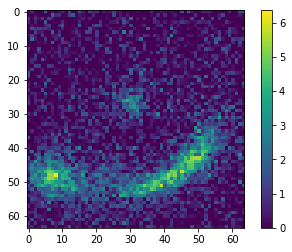

external_shear_e1 0.46957305
external_shear_e2 -0.3272191
lens_mass_center_x -0.049306132
lens_mass_center_y 0.14651802
lens_mass_e1 -0.14563811
lens_mass_e2 -0.09435817
lens_mass_gamma 1.9729527
lens_mass_theta_E_log -0.15823641


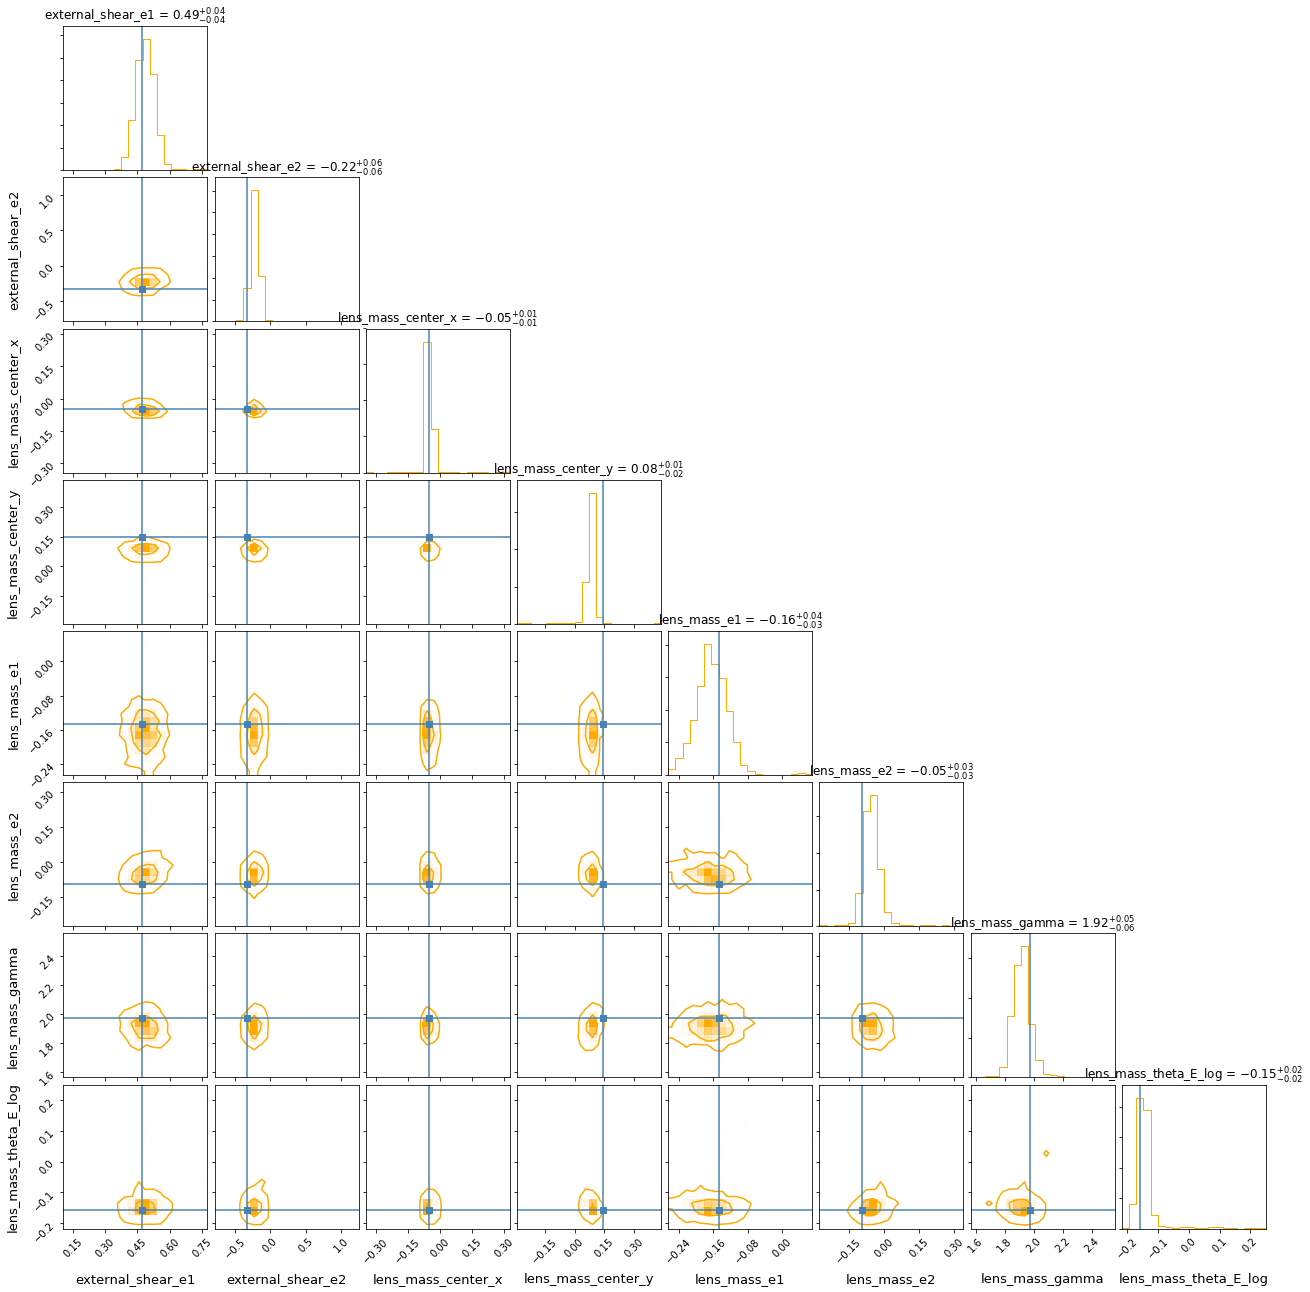

In [19]:
image_index = 5
bnn_infer.plot_posterior_contours(image_index)

## Diagonal Posterior - Shifting Image + Large Regularizer

In [20]:
# First specify the config path
config_path = '/home/swagnercarena/ovejero/configs/t1_hr.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
bnn_infer.gen_samples(num_samples)

100%|██████████| 1000/1000 [00:57<00:00, 17.33it/s]


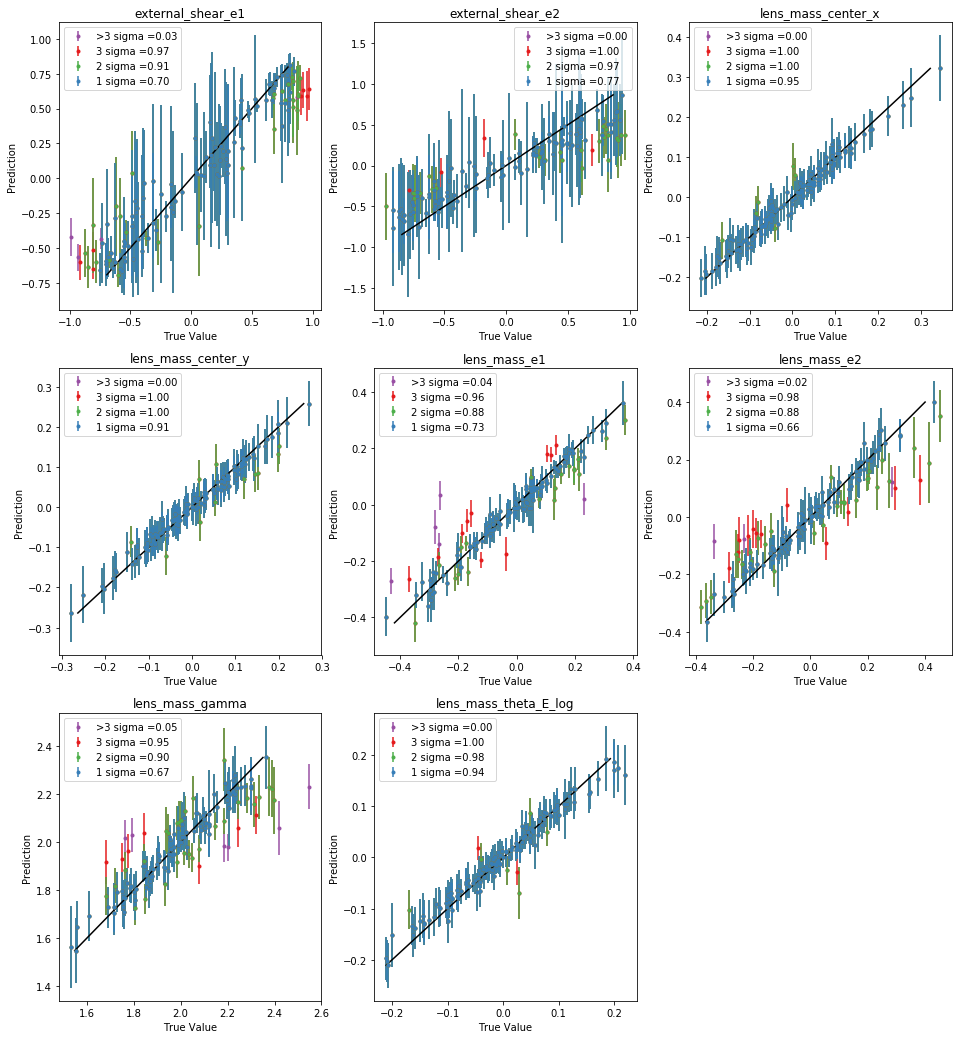

In [21]:
bnn_infer.gen_coverage_plots()

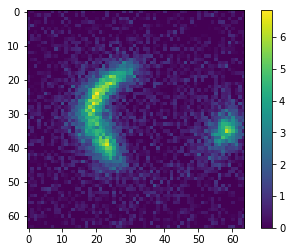

external_shear_e1 0.83806634
external_shear_e2 0.44987476
lens_mass_center_x 0.044151004
lens_mass_center_y -0.03254472
lens_mass_e1 -0.34788495
lens_mass_e2 -0.12993078
lens_mass_gamma 2.0050497
lens_mass_theta_E_log -0.07891502


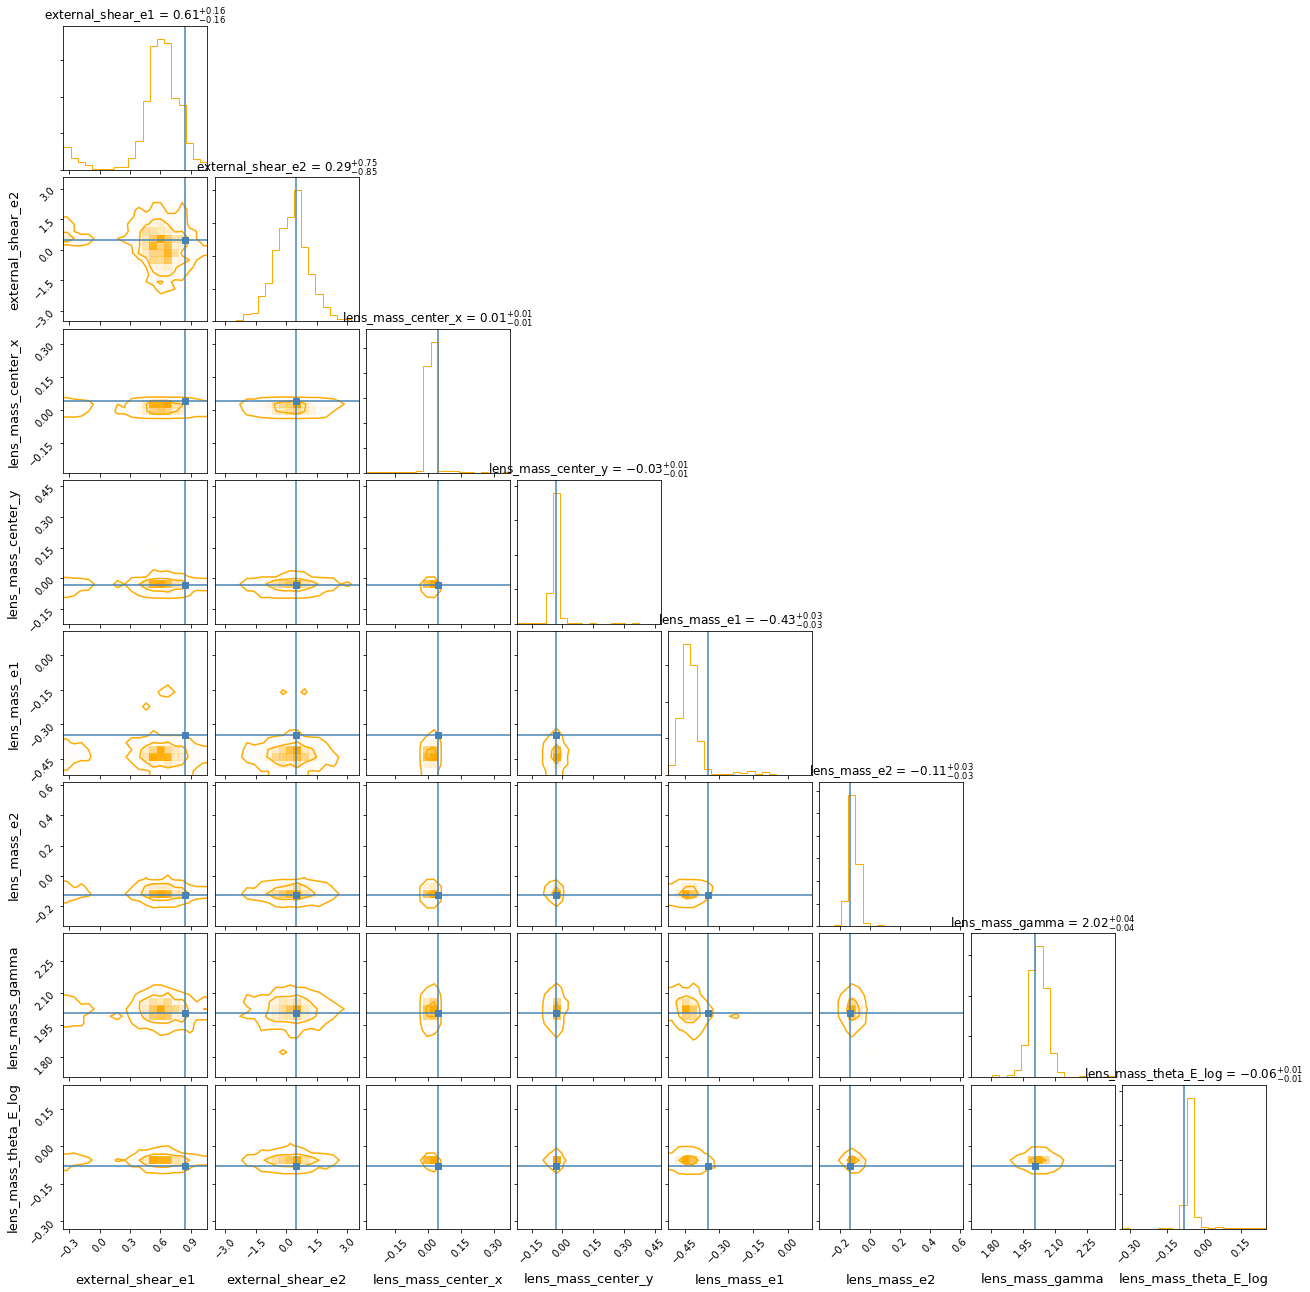

In [22]:
image_index = 10
bnn_infer.plot_posterior_contours(image_index)

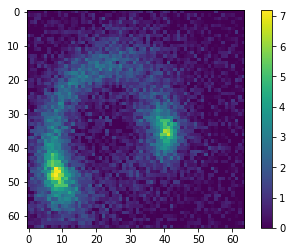

external_shear_e1 0.81051385
external_shear_e2 0.5158096
lens_mass_center_x -0.09432464
lens_mass_center_y 0.16909118
lens_mass_e1 0.100333296
lens_mass_e2 0.18822311
lens_mass_gamma 1.9625404
lens_mass_theta_E_log -0.08080719


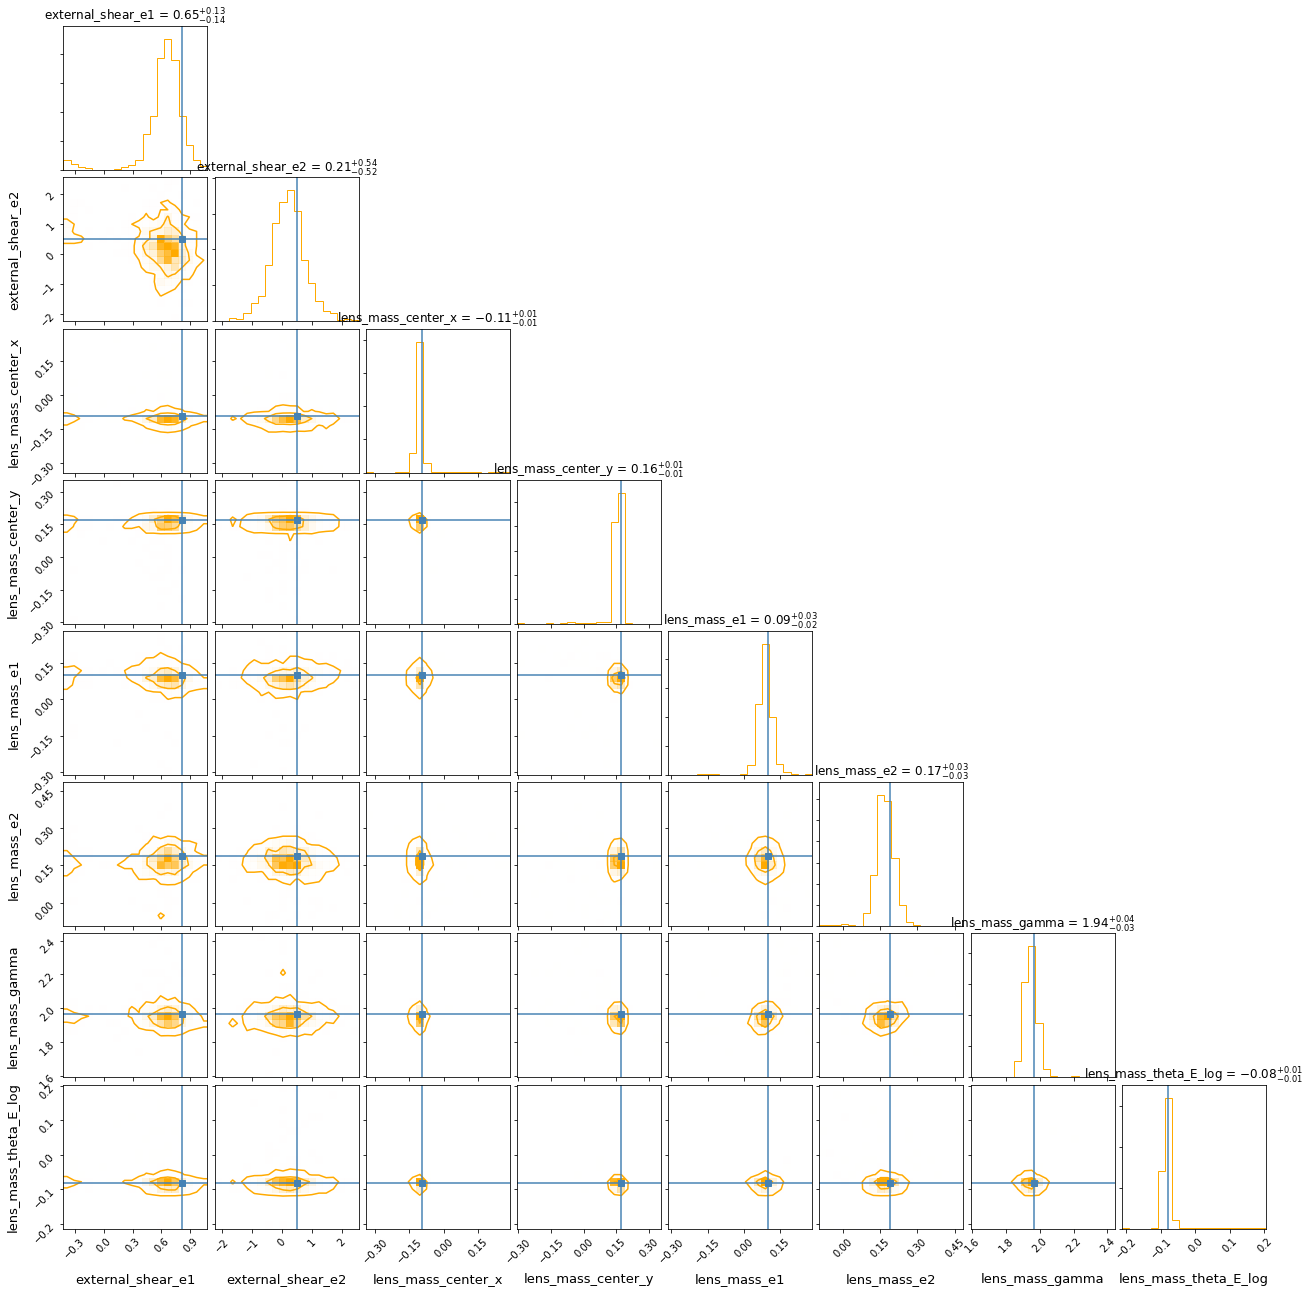

In [23]:
image_index = 5
bnn_infer.plot_posterior_contours(image_index)